In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
from citipy import citipy

Set up random lat and long points and apply them to the API requests

In [2]:
# Create a set of random latitude and longitude combinations
lats= np.random.uniform(low= -90, high= 90, size= 1500)
lngs= np.random.uniform(low= -90, high= 90, size= 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes to a list
coordinates= list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [5]:
# Starting URL for Weather Map API Call
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data
city_data=[]
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list
for i in range(len(cities)):
    # Group citites in sets of 50 for loggin purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    # Create endpoint URL with each city
    city_url= url + "&q=" + cities[i]

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 
    # Create endpoint URL with each city
    city_url= url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather= requests.get(city_url).json()
        # Parse out the needed data
        city_lat= city_weather['coord']['lat']
        city_lng= city_weather['coord']['lon']
        city_max_temp= city_weather['main']['temp_max']
        city_humidity= city_weather['main']['humidity']
        city_clouds= city_weather['clouds']['all']
        city_wind= city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard
        city_date= datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(), "Lat": city_lat,
                         "Lng": city_lng, "Max Temp": city_max_temp,
                         "Humidity": city_humidity, "Cloudiness": city_clouds,
                         "Wind Speed": city_wind, "Country": city_country,
                         "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | pozo colorado
Processing Record 2 of Set 12 | clyde river
Processing Record 3 of Set 12 | bilma
Processing Record 4 of Set 12 | sao filipe
Processing Record 5 of Set 12 | victoria
Processing Record 6 of Set 12 | hermanus
Processing Record 7 of Set 12 | cape town
Processing Record 8 of Set 12 | jamestown
Processing Record 9 of Set 12 | salalah
Processing Record 10 of Set 12 | port elizabeth
Processing Record 11 of Set 12 | mar del plata
Processing Record 12 of Set 12 | ponta delgada
Processing Record 13 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 12 | puerto ayacucho
Processing Record 15 of Set 12 | port alfred
Processing Record 16 of Set 12 | grootfontein
Processing Record 17 of Set 12 | hurghada
Processing Record 18 of Set 12 | burica
City not found. Skipping...
Processing Record 19 of Set 12 | hithadhoo
Processing Record 20 of Set 12 | visby
Processing Record 21 of Set 12 | ouro fino
Processing Record 22 of Set 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pozo Colorado,-23.4923,-58.7972,96.30,22,21,8.21,PY,2021-04-21 17:46:52
1,Clyde River,70.4692,-68.5914,10.40,92,75,11.50,CA,2021-04-21 17:46:53
2,Bilma,18.6853,12.9164,94.32,7,0,9.08,NE,2021-04-21 17:46:53
3,Sao Filipe,14.8961,-24.4956,73.22,71,100,10.65,CV,2021-04-21 17:46:53
4,Victoria,22.2855,114.1577,73.99,81,0,1.01,HK,2021-04-21 17:43:57
5,Hermanus,-34.4187,19.2345,66.00,81,68,5.01,ZA,2021-04-21 17:44:29
6,Cape Town,-33.9258,18.4232,64.99,88,0,11.50,ZA,2021-04-21 17:44:33
7,Jamestown,42.0970,-79.2353,32.00,80,90,6.91,US,2021-04-21 17:43:31
8,Salalah,17.0151,54.0924,81.12,74,98,5.46,OM,2021-04-21 17:46:54
9,Port Elizabeth,-33.9180,25.5701,68.00,88,40,10.36,ZA,2021-04-21 17:46:54


In [10]:
# Reorder the columns
new_columns= ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pozo Colorado,PY,2021-04-21 17:46:52,-23.4923,-58.7972,96.30,22,21,8.21
1,Clyde River,CA,2021-04-21 17:46:53,70.4692,-68.5914,10.40,92,75,11.50
2,Bilma,NE,2021-04-21 17:46:53,18.6853,12.9164,94.32,7,0,9.08
3,Sao Filipe,CV,2021-04-21 17:46:53,14.8961,-24.4956,73.22,71,100,10.65
4,Victoria,HK,2021-04-21 17:43:57,22.2855,114.1577,73.99,81,0,1.01


In [11]:
# Create the output file (CSV)
output_data_file= 'weather_data/cities.csv'
# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

Visualize the data

In [12]:
# Extract relevant fields from  the DataFrame from plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

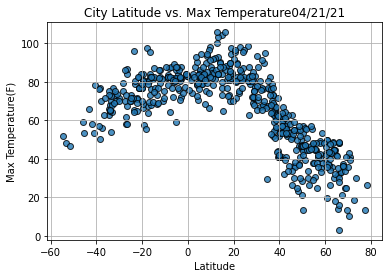

In [13]:
# Import time module 
import time
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

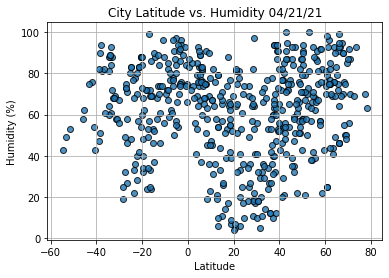

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show plot
plt.show()

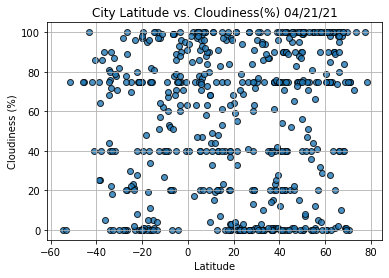

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black",linewidth=1,marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig3.png')
# Show plot
plt.show()

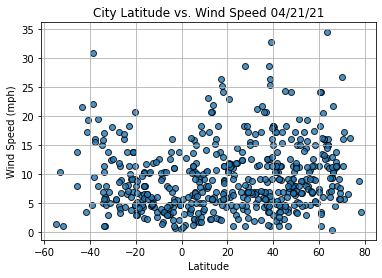

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,wind_speed,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig4.png")
# Show plot
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress
# Create a function to create preform linear regression on the weather data
#  and plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept 
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df= city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df= city_data_df.loc[(city_data_df['Lat'] < 0)]

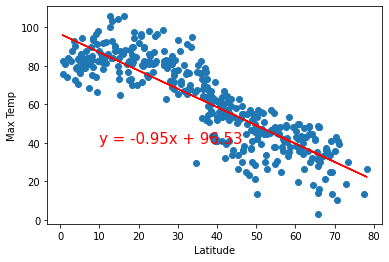

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Himisphere \ for Maximum Temperature', 'Max Temp',(10,40))

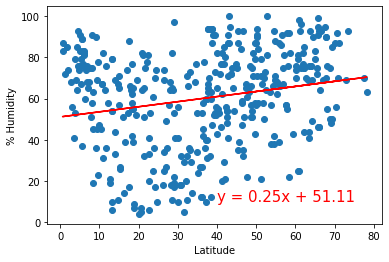

In [20]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Humidity","% Humidity",(40,10))


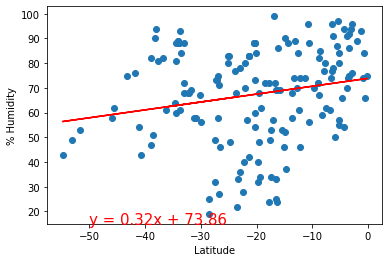

In [21]:
# Linear regression on the Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity","% Humidity",(-50,15))

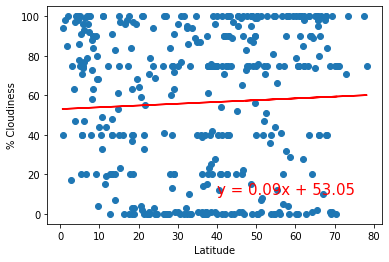

In [23]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Cloudiness","% Cloudiness",(40,10))


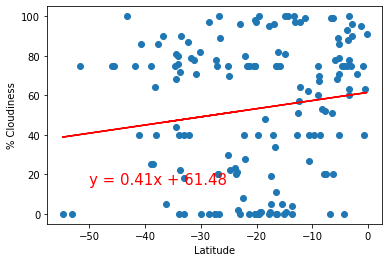

In [24]:
# Linear regression on the Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness","% Cloudiness",(-50,15))

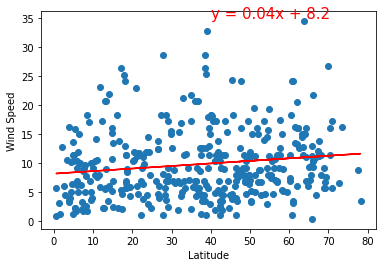

In [25]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed", (40,35))

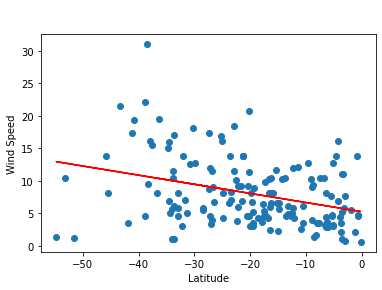

In [26]:
# Linear regression on the Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed","Wind Speed",(-50,35))